## Задача 4.3

In [1]:
%matplotlib inline  
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import csv

Информация Фишера для биномиального распределения $\frac{m}{p(p-1)}$. Но в случае распределения Бернулли, как частного случая: $i = \frac{1}{p(p-1)}$. Тогда нижняя оценка дисперсии несмещенной оценки по неравенству Рао-Крамера равна $\frac{1}{I(x)}$.

In [3]:
def fish(x, n):
    return x*(1-x)/n

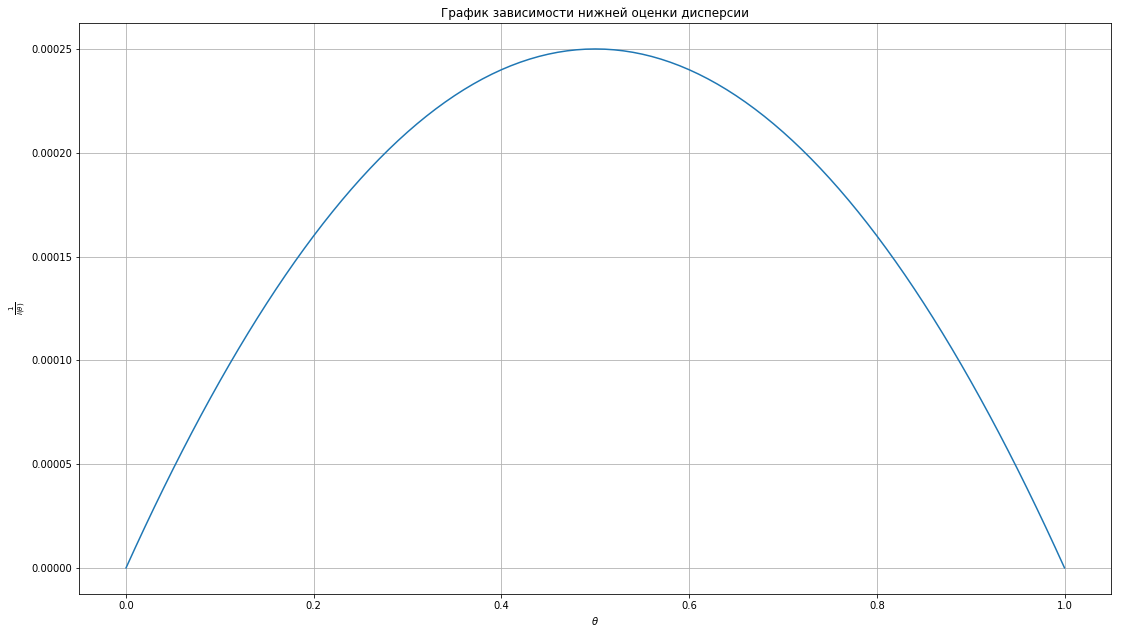

In [10]:
N = 1000
x = np.arange(0, 1.01, 0.01)
plt.plot(x, fish(x,N))
plt.title(r'График зависимости нижней оценки дисперсии')
plt.xlabel(r'$\theta$') #Метка по оси x в формате TeX
plt.ylabel(r'$\frac{1}{I(\theta)}$') #Метка по оси y в формате TeX
plt.grid(True) #Сетка
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

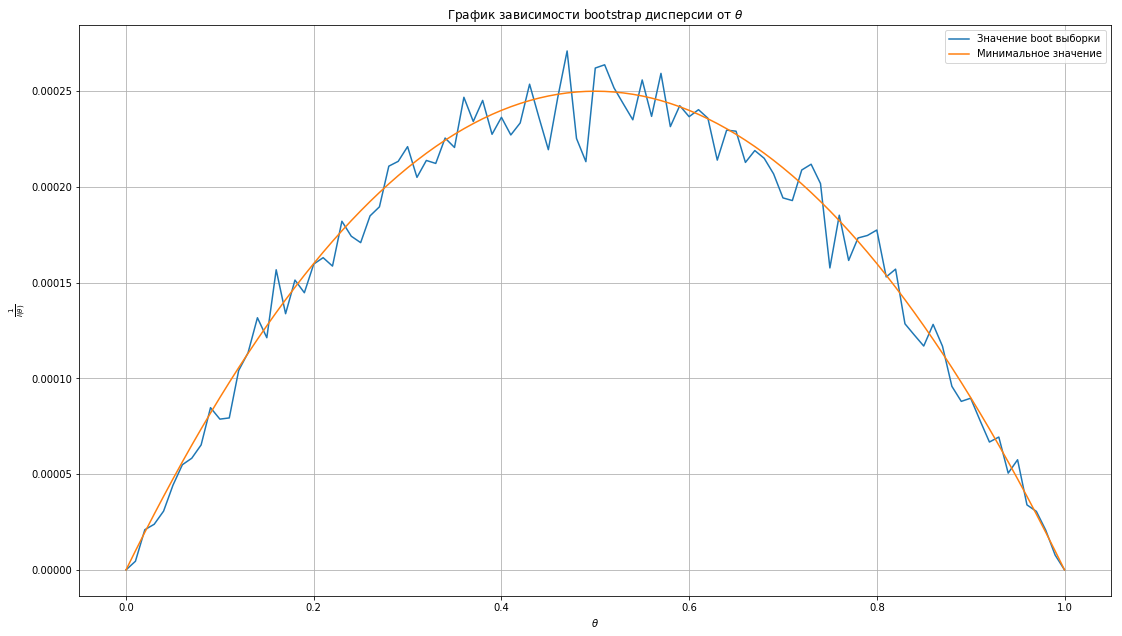

In [35]:
disp_boot = np.array([])
disp_stat = np.array([])
for t in x:
    sample = st.bernoulli.rvs(t, loc=0, size=N)
    if t > 0:
        disp_stat = np.append(disp_stat, np.mean(sample[:int(100*t)]))
    stat = np.mean(sample)
    bootstrap = np.array([])
    for i in range(500):
        boot_sample = st.bernoulli.rvs(stat, loc=0, size=N)
        bootstrap = np.append(bootstrap, np.mean(boot_sample))
    disp_boot = np.append(disp_boot, np.var(bootstrap))
plt.plot(x, disp_boot, label=r'Значение boot выборки')
plt.plot(x, fish(x,N), label=r'Минимальное значение')
plt.title(r'График зависимости bootstrap дисперсии от $\theta$')
plt.xlabel(r'$\theta$') #Метка по оси x в формате TeX
plt.ylabel(r'$\frac{1}{I(\theta)}$') #Метка по оси y в формате TeX
plt.grid(True) #Сетка
plt.legend(fontsize=12, loc=1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.show()

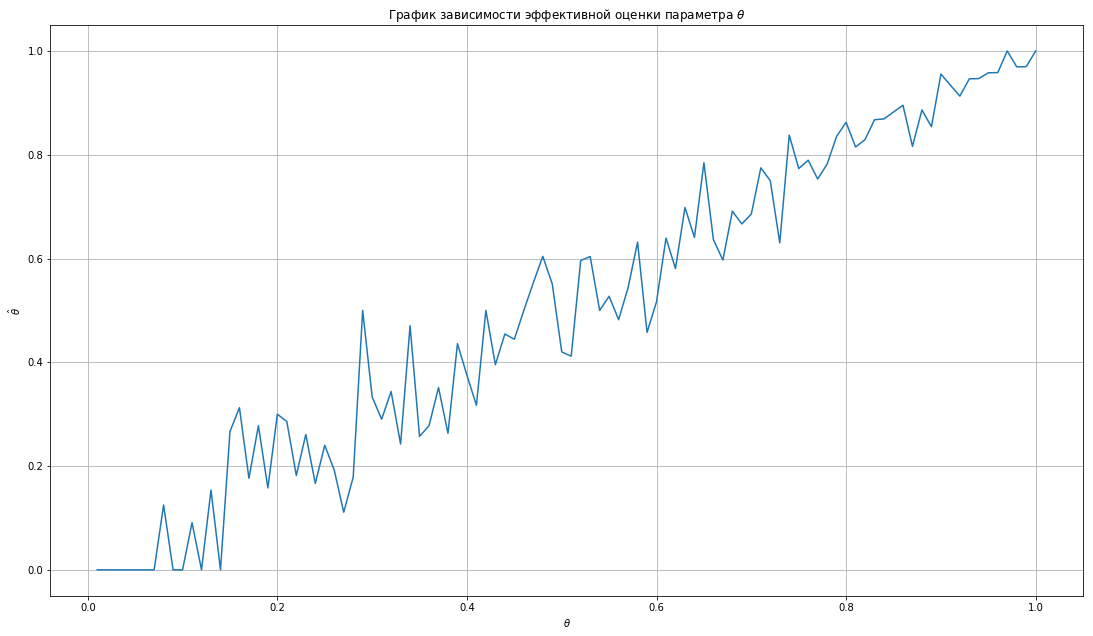

In [37]:
plt.plot(x[1:], disp_stat)
plt.title(r'График зависимости эффективной оценки параметра $\theta$')
plt.xlabel(r'$\theta$') #Метка по оси x в формате TeX
plt.ylabel(r'$\hat{\theta}$') #Метка по оси y в формате TeX
plt.grid(True) #Сетка
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Получили график который приближает прямую $y = x$, так как это график зависимоти оценки $\theta$ от самого значения $\theta$.

## Вывод

Исходя из графиков можно видеть, что бутстрепная оценка дисперсии приближает нижнюю оценку дисперсии из неравенства Рао-Крамера, что говорит о ее эффективности при $n \rightarrow \infty$ так как оценка параметра называется эффективной, если для неё неравенство Рао-Крамера обращается в равенство. Таким образом, неравенство может быть использовано для доказательства того, что дисперсия данной оценки наименьшая из возможных, то есть что данная оценка в некотором смысле лучше всех остальных.